In [2]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math 
from math import log10, floor, sqrt
import my_lib as my

In [3]:
df = pd.read_csv('PERIODI2.csv')
df.head()

,x,T^2
0,0.61,2.48
1,0.50,2.04
2,0.40,1.64
3,0.30,1.23


In [4]:
colx='x'
x=df[colx]
x
X=np.mean(x)


In [5]:
sigma=np.std(x)

In [6]:
Var=pow(sigma,2)
Var

0.013268749999999998

In [7]:
coly='T^2'
y=df[coly]
Y=np.mean(y)
y

0    2.48
1    2.04
2    1.64
3    1.23
Name: T^2, dtype: float64

In [8]:
sd_y = df[coly].std()

In [9]:
sd_y

0.5358715642141626

In [10]:
def cov(a, b):

       if len(a) != len(b):
           return

       a_mean = np.mean(a)
       b_mean = np.mean(b)

       sum = 0

       for i in range(0, len(a)):
           sum += ((a[i] - a_mean) * (b[i] - b_mean))

       return sum/(len(a)-1)


In [11]:
cov(x,y)

0.07127499999999999

In [12]:
mu_m1= cov(x,y)/Var
mu_m1


5.37164390014131

In [13]:
mu_c1= Y-(mu_m1*X)
mu_c1

-0.5831688648139428

Text(0, 0.5, 'T^2')

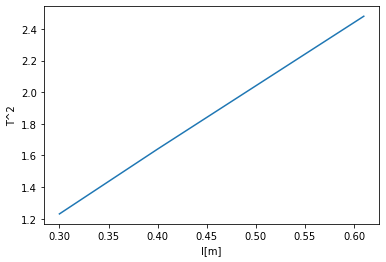

In [17]:
plt.plot (x, y)
plt.xlabel('l[m]')
plt.ylabel('T^2')


In [14]:
# funzione per valore atteso pesato per 1/$\sigma_i^2$
def my_mean(x, w):
    return np.sum( x*np.power(w, -2) ) / np.sum( np.power(w, -2) )

def my_cov(x, y, w):
    return my_mean(x*y, w) - my_mean(x, w)*my_mean(y, w)

def my_var(x, w):
    return my_cov(x, x, w)

In [23]:
my_var(x, sigma)

-2.4309111111111106

In [15]:
# funzione che calcola m, c, sd_m, sd_c, cov_mc a partire da
# x, y, sd_y
def my_fit(x, y, sd_y, verbose=True):
    m = my_cov(x, y, sd_y) / my_var(x, sd_y)
    var_m = 1 / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)) )
    c = np.mean(y) - np.mean(x) * m
    var_c = my_mean(x*x, sd_y)  / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)))
    cov_mc = - my_mean(x, sd_y) / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2))) 
    if (verbose):
        print ('m         = ', my.round_sig(m, 2))
        print ('sigma(m)  = ', my.round_sig(np.sqrt(var_m), 2))
        print ('c         = ', my.round_sig(c, 2))
        print ('sigma(c)  = ', my.round_sig(np.sqrt(var_c), 2))
        print ('cov(m, c) = ', my.round_sig(cov_mc, 2))
        
    return m, np.sqrt(var_m), c, np.sqrt(var_c), cov_mc

In [24]:
np.sum(np.power(sd_y,-2))

3.482399373168112

In [16]:
# relazione lineare tra valori veri
def my_line(x, m=1, c=0):
    return x*m +c

mu_m = mu_m1
mu_c = mu_c1
# numero di punti
n = 4
xmin = 0.3
xmax = 0.61
# incertezza y
sigma_y = np.repeat(.5, n)
# misure x equi-spaziate tra 1 e n
x = np.linspace(xmax, xmin, n)
yi = np.vectorize(my_line)(x, mu_m, mu_c)
# y(n) gaussiane, l'ultimo parametro dice di costruire un array
# di dimensione n a partire dagli n valori di yi e sigma_y
#y = np.random.normal(yi,  sigma_y, (n, 1)).flatten()

m         =  4.016
sigma(m)  =  2.164
c         =  0.02016
sigma(c)  =  1.016
cov(m, c) =  -2.131


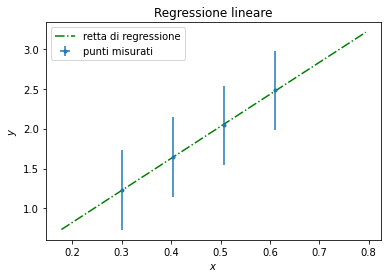

In [17]:
# faccio il fit
m, sigma_m, c, sigma_c, cov_mc = my.lin_fit(x, y, sigma_y, 
                                            verbose=True, plot=True)

In [29]:
g=pow((math.pi*2),2)/m
g

9.829967435623061

In [35]:
np.std(g)

0.0

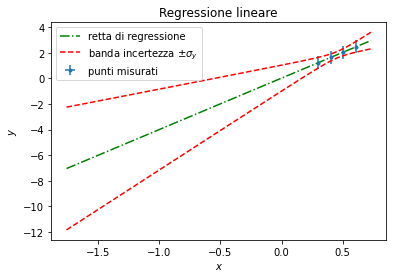

In [19]:
# rappresento i punti misurati
plt.errorbar(x, y, yerr=sigma_y, xerr=0, ls='', marker='.', label='punti misurati')

# costruisco dei punti x su cui valutare la retta di regressione
xl = np.linspace(0.8*xmin-2, xmax*1.2, 100)
# uso i parametri medi di m e c
yl = my_line(xl, m, c)
# rappresento la retta di regressione
plt.plot(xl, yl, 'g-.', label='retta di regressione')

# propagazione incertezza su y a partire da m e c
def y_inc(xl, sigma_m, sigma_c, cov_mc):
    return np.sqrt(np.power(xl, 2)*np.power(sigma_m, 2) +
                   np.power(sigma_c, 2) +
                  2*xl*cov_mc) 

# incertezza sulle y
yinc = y_inc(xl, sigma_m, sigma_c, cov_mc)

# curve a y +- incertezza
plt.plot(xl, yl+yinc, 'r--', label='banda incertezza $\pm \sigma_y$')
plt.plot(xl, yl-yinc, 'r--')   

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Regressione lineare')
a=plt.legend()

In [27]:
m


4.016129032258095

In [31]:
sgm=2.164

In [33]:
gr=pow((math.pi*2),2)/sgm
gr

18.243261369850938